In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import rqc

In [3]:
import pandas as pd

In [4]:
zz = pd.read_csv('/p/home/hpan/CT_MPS/ram_usage_20251014_150556.log')

In [5]:
zz['Used_MB']/96

0         1040.520833
1         1057.468750
2         1074.375000
3         1088.854167
4         1098.125000
             ...     
40972    24471.052083
40973    24441.760417
40974    24431.218750
40975    24509.822917
40976    24450.479167
Name: Used_MB, Length: 40977, dtype: float64

<Axes: xlabel='Timestamp'>

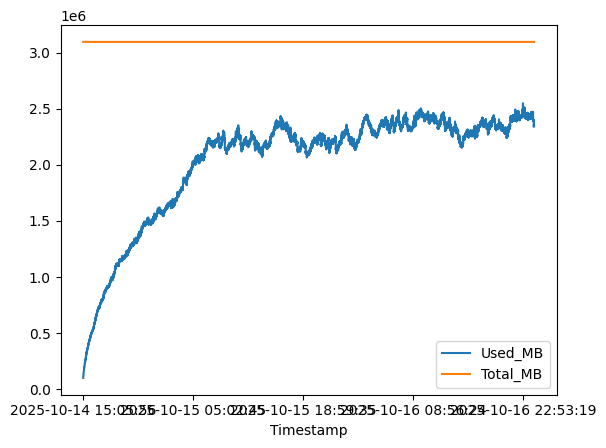

In [6]:
fig,ax=plt.subplots()
zz[['Timestamp','Used_MB']].set_index('Timestamp').plot(ax=ax)
zz[['Timestamp','Total_MB']].set_index('Timestamp').plot(ax=ax)

In [14]:
2.5*1e3/92

27.17391304347826

In [5]:
z=rqc.load_json('MPS_0-1_coherence_T_L30/MPS_(0,1)_L30_pctrl0.500_pproj0.000_mb1200_t1.0_s1000_coherence_T.json')
len(z['coh_mat'])
plt.scatter(np.arange(900),z['coh_mat'])

In [10]:
len(z['coh_mat'])

900

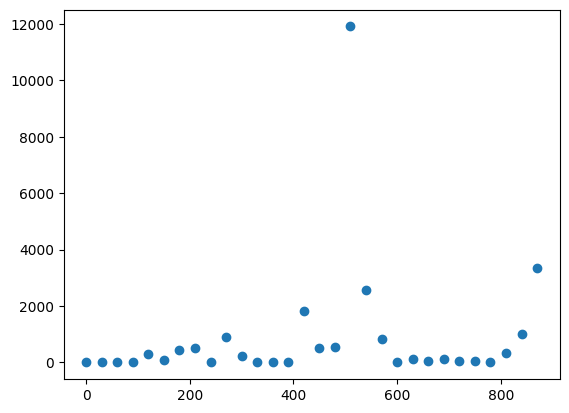

In [11]:
plt.scatter(np.arange(900),z['coh_mat'])

In [4]:
# L=10
params_list=[
({'nu':0,'de':1,'L':10},{'s':np.arange(00000,2000),'p_ctrl':[.5,],'p_proj':[0.],'maxbond':[120],'t':[1]}),
({'nu':0,'de':1,'L':20},{'s':np.arange(00000,2000),'p_ctrl':[.5,],'p_proj':[0.],'maxbond':[200],'t':[1]}),
({'nu':0,'de':1,'L':30},{'s':np.arange(00000,2000),'p_ctrl':[.5,],'p_proj':[0.],'maxbond':[1200],'t':[1]}),
({'nu':0,'de':1,'L':40},{'s':np.arange(00000,2000),'p_ctrl':[.5,],'p_proj':[0.],'maxbond':[4000],'t':[.2]}),
]

In [5]:
data_MPS_0_T_dict = {'fn':set()}

In [6]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=rqc.generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_mb{maxbond}_t{t:.1f}_s{s}_coherence_T.json',
        fn_dir_template='./',
        input_params_template='',
        load_data=rqc.load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        # data_dict={'fn':set()},
        data_dict=data_MPS_0_T_dict,
        zip_fn=f'./MPS_0-1_coherence_T_L{fixed_params["L"]}.zip',
        # zip_fn=f'/p/work/hpan/CT_MPS/MPS_0-1_coherence_T_L{fixed_params["L"]}.zip',
        add_to_dict_keys = ['L','p_ctrl','p_proj','maxbonddim','t','s']
    )
df_MPS_0_T=rqc.convert_pd(data_MPS_0_T_dict,names=['Metrics','L','p_ctrl','p_proj','maxbonddim','t','s'])

generate_params:   0%|          | 0/2000 [00:00<?, ?it/s]

generate_params: 100%|██████████| 2000/2000 [00:00<00:00, 13772.41it/s]


In [7]:
df_MPS_0_T

observations
Metrics L  p_ctrl p_proj maxbonddim t   s                                                      
errors  10 0.5    0.0    120        1.0 0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
coh_mat 10 0.5    0.0    120        1.0 0     [0.0, 0.0, 2.2358861173546605, 4.7483097141991...
ranks   10 0.5    0.0    120        1.0 0     [1.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 2.0, 4.0, ...
errors  10 0.5    0.0    120        1.0 1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
coh_mat 10 0.5    0.0    120        1.0 1     [0.0, 0.7709992229403873, 0.8276066363086327, ...
...                                                                                         ...
        40 0.5    0.0    4000       0.2 1998  [0.0, 2.942774740290704, 0.9334592223040372, -...
ranks   40 0.5    0.0    4000       0.2 1998  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, ...
errors  40 0.5    0.0    4000       0.2 1999  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
coh_mat 40 0.5    0.0    4000       0.2 1999  [1.7803272794123424, 5.0355664114243845, 11.04...
ranks   40 0.5    0.0    4000       0.2 1999  [2.0, 2.0, 4.0, 4.0, 4.0, 3.0, 4.0, 2.0, 2.0, ...

[23763 rows x 1 columns]

In [8]:
L_list=[10,20,30,40]

(0.0, 400.0)

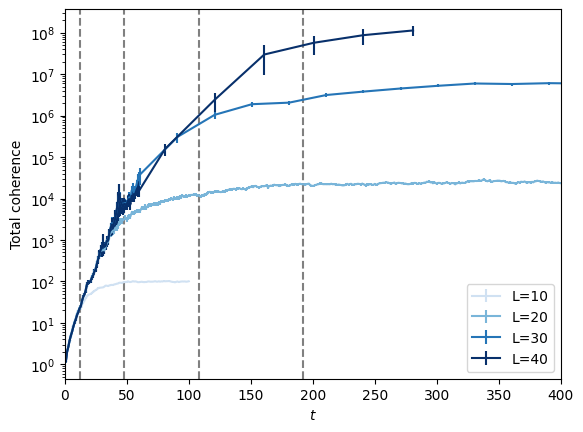

In [9]:
fig,ax=plt.subplots()
mb_list = [120,200,1200,4000]
t_list = [1,1,1,0.2]
color_list = plt.cm.Blues(np.linspace(0.2,1,len(L_list)))
# for idx, (L, mb) in enumerate(zip(L_list,mb_list)):
for idx, L in enumerate(L_list):
    data_ =np.stack( df_MPS_0_T.xs('coh_mat',level='Metrics').xs(L,level='L').xs(0.5,level='p_ctrl').xs(0,level='p_proj').xs(mb_list[idx],level='maxbonddim').xs(t_list[idx],level='t')['observations'])
    x = np.arange(data_.shape[1])+1
    data_[data_==None]= np.nan
    data_ = data_.astype(float)

    y = data_.mean(axis=0)
    notnan=~np.isnan(y)
    yerr = data_.std(axis=0)/np.sqrt(data_.shape[0])
    ax.errorbar(x[notnan],y[notnan],yerr[notnan], label=f'L={L}',color=color_list[idx])
    ax.axvline(L**2*0.12,ls='--',color='gray')
# ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$t$')
ax.set_ylabel('Total coherence')
ax.legend()
ax.set_xlim(0,400)

In [1]:
30**2

900

In [13]:
0.2*40**2

320.0

In [ ]:
df_MPS_0_T=rqc.convert_pd(data_MPS_0_T_dict,names=['Metrics','L','p_ctrl','p_proj','maxbond','seed'])

In [20]:
data_MPS_0_T_dict.keys()

dict_keys(['fn', ('coh_mat', 10, 0.5, 0.0, 0), ('coh_mat', 10, 0.5, 0.0, 1), ('coh_mat', 10, 0.5, 0.0, 2), ('coh_mat', 10, 0.5, 0.0, 3), ('coh_mat', 10, 0.5, 0.0, 4), ('coh_mat', 10, 0.5, 0.0, 5), ('coh_mat', 10, 0.5, 0.0, 6), ('coh_mat', 10, 0.5, 0.0, 7), ('coh_mat', 10, 0.5, 0.0, 8), ('coh_mat', 10, 0.5, 0.0, 9), ('coh_mat', 10, 0.5, 0.0, 10), ('coh_mat', 10, 0.5, 0.0, 11), ('coh_mat', 10, 0.5, 0.0, 12), ('coh_mat', 10, 0.5, 0.0, 13), ('coh_mat', 10, 0.5, 0.0, 14), ('coh_mat', 10, 0.5, 0.0, 15), ('coh_mat', 10, 0.5, 0.0, 16), ('coh_mat', 10, 0.5, 0.0, 17), ('coh_mat', 10, 0.5, 0.0, 18), ('coh_mat', 10, 0.5, 0.0, 19), ('coh_mat', 10, 0.5, 0.0, 20), ('coh_mat', 10, 0.5, 0.0, 21), ('coh_mat', 10, 0.5, 0.0, 22), ('coh_mat', 10, 0.5, 0.0, 23), ('coh_mat', 10, 0.5, 0.0, 24), ('coh_mat', 10, 0.5, 0.0, 25), ('coh_mat', 10, 0.5, 0.0, 26), ('coh_mat', 10, 0.5, 0.0, 27), ('coh_mat', 10, 0.5, 0.0, 28), ('coh_mat', 10, 0.5, 0.0, 29), ('coh_mat', 10, 0.5, 0.0, 30), ('coh_mat', 10, 0.5, 0.0, 31), (

In [13]:
data_MPS_0_T_dict[('coh_mat', 10, 0.5, 0.0, 1)]

[0.0,
 2.4378660994533523,
 4.952156539647307,
 0.0,
 1.8005992212862676,
 0.96041553205955,
 2.6461534241305453,
 0.9626459681619532,
 1.7431159728225185,
 0.0,
 0.0,
 2.836849940815708,
 4.722094718727962,
 0.9382780083343987,
 0.7177768995019573,
 2.0130123663880117,
 0.5703790899553731,
 0.873760673381323,
 2.806552677901116,
 3.2162495637441584,
 4.8807422509371925,
 0.6992570159036537,
 0.0,
 0.0,
 0.9421712303652023,
 0.0,
 0.20196814281091768,
 2.404405937274434,
 2.044675239269569,
 2.4706027700086963,
 6.527427547027693,
 0.6918666682094823,
 0.7544934818373994,
 0.9253324041116955,
 0.980605876393601,
 2.5083402008783016,
 2.1455885671151362,
 0.8824474400345665,
 0.9947893155832037,
 5.358664135086947,
 0.9468726693546454,
 0.0,
 5.565986821952366,
 0.0,
 4.901437313277331,
 0.0,
 0.0,
 0.6760695181278371,
 6.153844126102543,
 0.7877895086299125,
 0.43212535150737597,
 0.0,
 4.9614574648659735,
 0.40144825646961935,
 1.9545840514843973,
 0.7180430526711814,
 0.0,
 0.9815500

In [ ]:
k